# 🏠 房屋價格探索性資料分析 (EDA)

**專案目標：** 對 Kaggle 房屋價格資料集進行完整探索性分析  
**資料來源：** [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)  
**分析重點：** 了解資料分布、找出重要特徵、檢測資料問題、為特徵工程做準備

In [37]:
# Cell 1: 載入自訂模組
import sys
import os

# 添加 src 到 Python 路徑
sys.path.append('../src')

# 載入自訂模組
from data_loader import load_dataset, get_data_info
from data_cleaner import check_missing_data, remove_high_missing_columns
from visualization import plot_price_distribution, plot_correlation_analysis
from feature_engineering import create_new_features, apply_log_transform
from utils import setup_environment, detect_outliers_iqr

# 設定環境
setup_environment()

print("✅ 所有模組載入完成！")

✅ 環境設定完成
✅ 所有模組載入完成！


In [38]:
# Cell 2: 載入資料
train, test = load_dataset('../data')

if train is not None:
    get_data_info(train, test)
    
    # 顯示前幾筆資料
    print("\n📋 資料預覽:")
    display(train.head(3))
else:
    print("❌ 無法載入資料，請檢查 data/ 資料夾是否有 train.csv 和 test.csv")

✅ 資料集載入成功
📊 資料集資訊:
訓練集形狀: (1460, 81)
測試集形狀: (1459, 80)
訓練集欄位: 81
測試集欄位: 80
目標變數範圍: $34,900 - $755,000

📋 資料預覽:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


🎯 目標變數分析


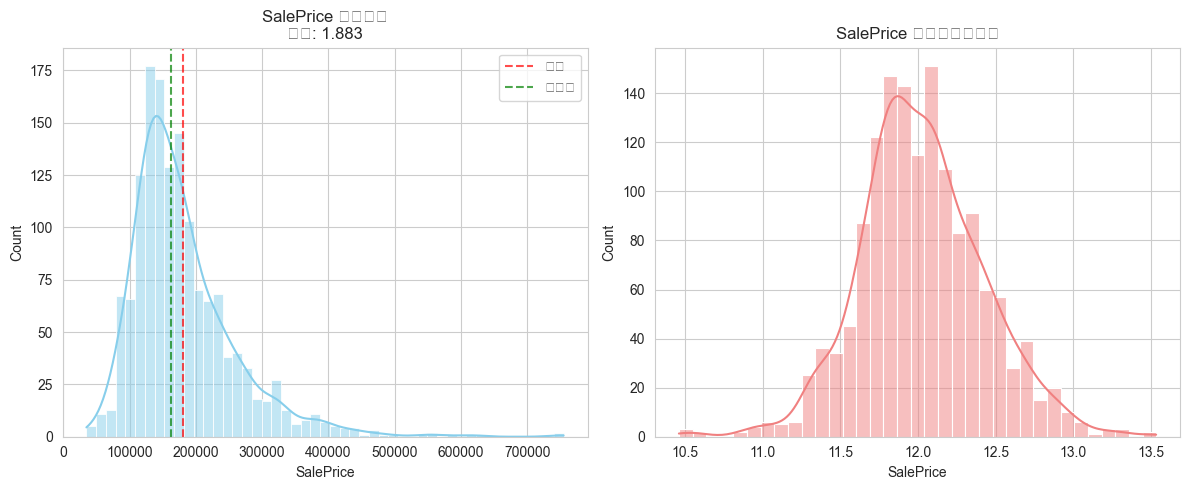

平均值: $180,921
中位數: $163,000
標準差: $79,443
偏態係數: 1.883


In [39]:
# Cell 3: 目標變數分析
print("🎯 目標變數分析")

if train is not None and 'SalePrice' in train.columns:
    # 使用模組函數繪製分布圖
    fig_price = plot_price_distribution(train)  # 儲存圖表引用
    plt.show()

    # 基本統計
    sp_stats = train['SalePrice'].describe()
    print(f"平均值: ${sp_stats['mean']:,.0f}")
    print(f"中位數: ${sp_stats['50%']:,.0f}")
    print(f"標準差: ${sp_stats['std']:,.0f}")
    print(f"偏態係數: {train['SalePrice'].skew():.3f}")
else:
    print("❌ 訓練資料中沒有 SalePrice 欄位")

In [40]:
# Cell 4: 缺失值分析
print("🕳️ 缺失值分析")

if train is not None:
    # 使用模組函數分析缺失值
    missing_report = check_missing_data(train, show_top=10)

    # 清理高缺失值欄位
    train_clean = remove_high_missing_columns(train, threshold=80)
    print(f"清理後資料形狀: {train_clean.shape}")

🕳️ 缺失值分析
🕳️ 缺失值分析:
有缺失值的欄位數量: 19
總缺失值數量: 7829

缺失最嚴重的 10 個欄位:


,缺失數量,缺失比例%
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
MasVnrType,872,59.73
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageYrBlt,81,5.55
GarageCond,81,5.55
GarageType,81,5.55


🗑️ 移除 4 個缺失超過 80% 的欄位:
  - Alley: 93.8%
  - PoolQC: 99.5%
  - Fence: 80.8%
  - MiscFeature: 96.3%
清理後資料形狀: (1460, 77)
清理後資料形狀: (1460, 77)


📈 相關性分析


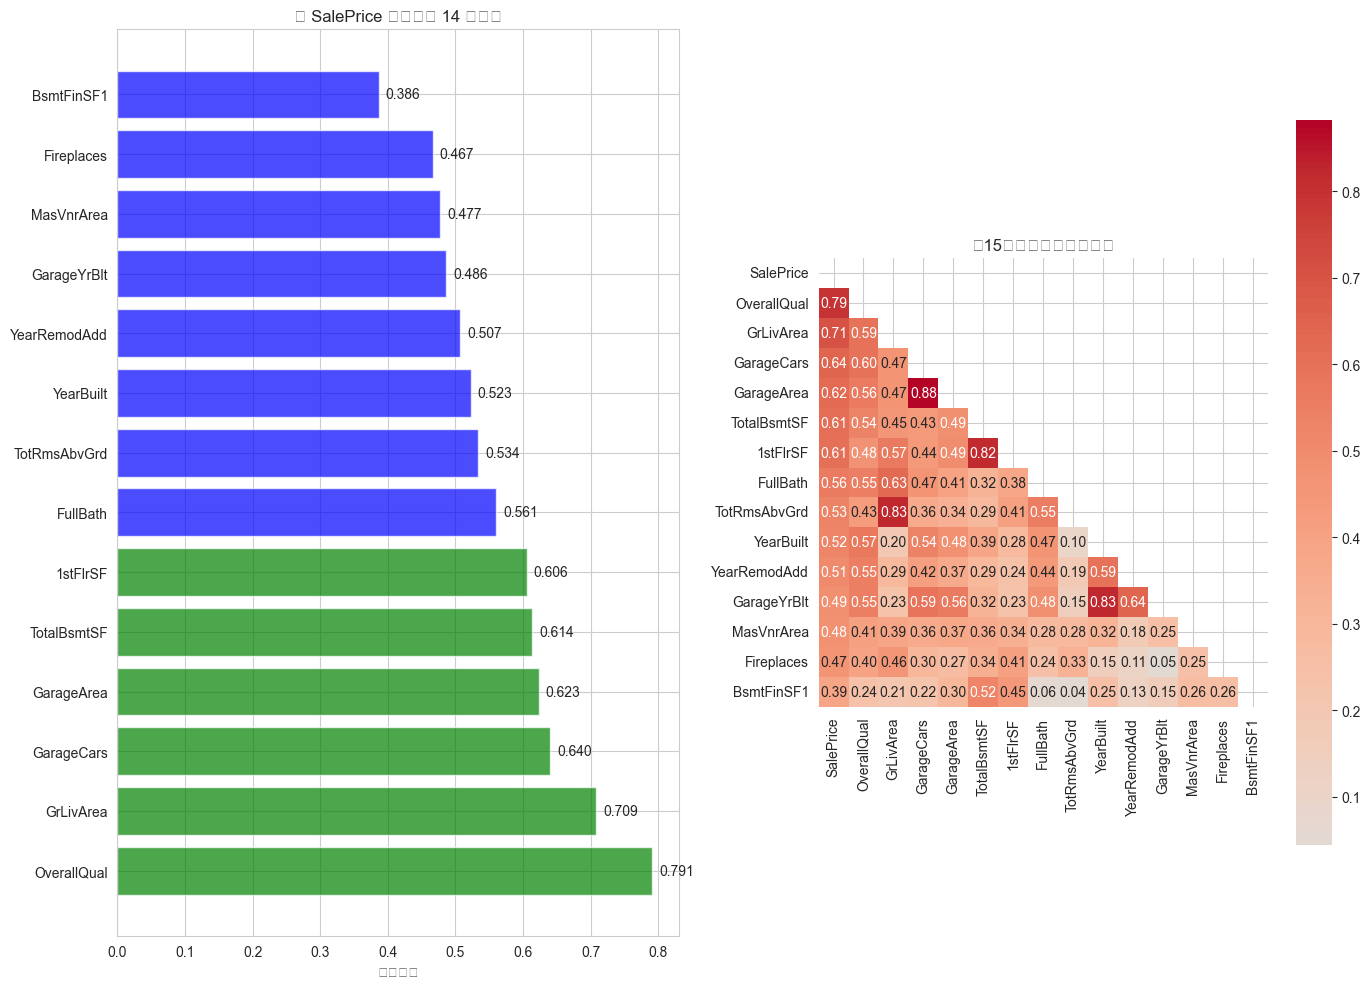

🏆 與 SalePrice 最相關的特徵:


,特徵,相關係數
0,SalePrice,1.000000
1,OverallQual,0.790982
2,GrLivArea,0.708624
3,GarageCars,0.640409
4,GarageArea,0.623431
5,TotalBsmtSF,0.613581
6,1stFlrSF,0.605852
7,FullBath,0.560664
8,TotRmsAbvGrd,0.533723
9,YearBuilt,0.522897


In [41]:
# Cell 5: 相關性分析
print("📈 相關性分析")

if train_clean is not None and 'SalePrice' in train_clean.columns:
    # 使用模組函數進行相關性分析
    fig_corr, corr_df = plot_correlation_analysis(train_clean, top_n=15)  # 儲存圖表引用
    plt.show()

    print("🏆 與 SalePrice 最相關的特徵:")
    display(corr_df.head(10))

In [42]:
# Cell 6: 離群值檢測
print("🚨 離群值檢測")

if train_clean is not None:
    # 檢測數個重要特徵的離群值
    important_features = ['GrLivArea', 'TotalBsmtSF', 'LotArea']
    for feature in important_features:
        if feature in train_clean.columns:
            outliers = detect_outliers_iqr(train_clean, feature)
            if len(outliers) > 0:
                print(f"{feature} 離群值範例:")
                display(outliers[[feature, 'SalePrice']].head(2) if 'SalePrice' in outliers.columns else outliers[[feature]].head(2))

🚨 離群值檢測
📊 GrLivArea 離群值檢測:
  正常範圍: 158.62 - 2747.62
  離群值數量: 31
GrLivArea 離群值範例:


,GrLivArea,SalePrice
58,2945,438780
118,3222,320000


📊 TotalBsmtSF 離群值檢測:
  正常範圍: 42.00 - 2052.00
  離群值數量: 61
TotalBsmtSF 離群值範例:


,TotalBsmtSF,SalePrice
17,0,90000
39,0,82000


📊 LotArea 離群值檢測:
  正常範圍: 1481.50 - 17673.50
  離群值數量: 69
LotArea 離群值範例:


,LotArea,SalePrice
53,50271,385000
66,19900,180000


In [43]:
# Cell 7: 特徵工程
print("🛠️ 特徵工程")

if train_clean is not None:
    # 建立新特徵
    train_with_features = create_new_features(train_clean)
    print(f"新增特徵後資料形狀: {train_with_features.shape}")

    # 對數轉換
    columns_to_transform = ['SalePrice', 'GrLivArea', 'LotArea']
    train_transformed = apply_log_transform(train_with_features, columns_to_transform)

    # 顯示新特徵
    new_feature_cols = [col for col in train_transformed.columns if col not in train_clean.columns]
    print(f"新增的欄位: {new_feature_cols}")
    
    # 顯示新特徵的基本資訊
    if new_feature_cols:
        print("\n新特徵統計:")
        display(train_transformed[new_feature_cols].describe())

🛠️ 特徵工程
✅ 新增特徵: HouseAge (房屋年齡)
✅ 新增特徵: TotalArea (總面積)
✅ 新增特徵: HasPool (是否有游泳池)
✅ 新增特徵: TotalBath (衛浴總數)
新增特徵後資料形狀: (1460, 81)
✅ 對數轉換: SalePrice → log_SalePrice
✅ 對數轉換: GrLivArea → log_GrLivArea
✅ 對數轉換: LotArea → log_LotArea
新增的欄位: ['HouseAge', 'TotalArea', 'HasPool', 'TotalBath', 'log_SalePrice', 'log_GrLivArea', 'log_LotArea']

新特徵統計:


,HouseAge,TotalArea,HasPool,TotalBath,log_SalePrice,log_GrLivArea,log_LotArea
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,36.547945,4082.512329,0.004795,2.210616,12.024057,7.268512,9.110966
std,30.250152,1306.309133,0.069100,0.785399,0.399449,0.333303,0.517369
min,0.000000,668.000000,0.000000,1.000000,10.460271,5.814131,7.170888
25%,8.000000,3168.000000,0.000000,2.000000,11.775105,7.030415,8.929898
50%,35.000000,3941.500000,0.000000,2.000000,12.001512,7.289611,9.156887
75%,54.000000,4768.500000,0.000000,2.500000,12.273736,7.483104,9.358976
max,136.000000,17394.000000,1.000000,6.000000,13.534474,8.638171,12.279537


🏘️ 類別特徵分析


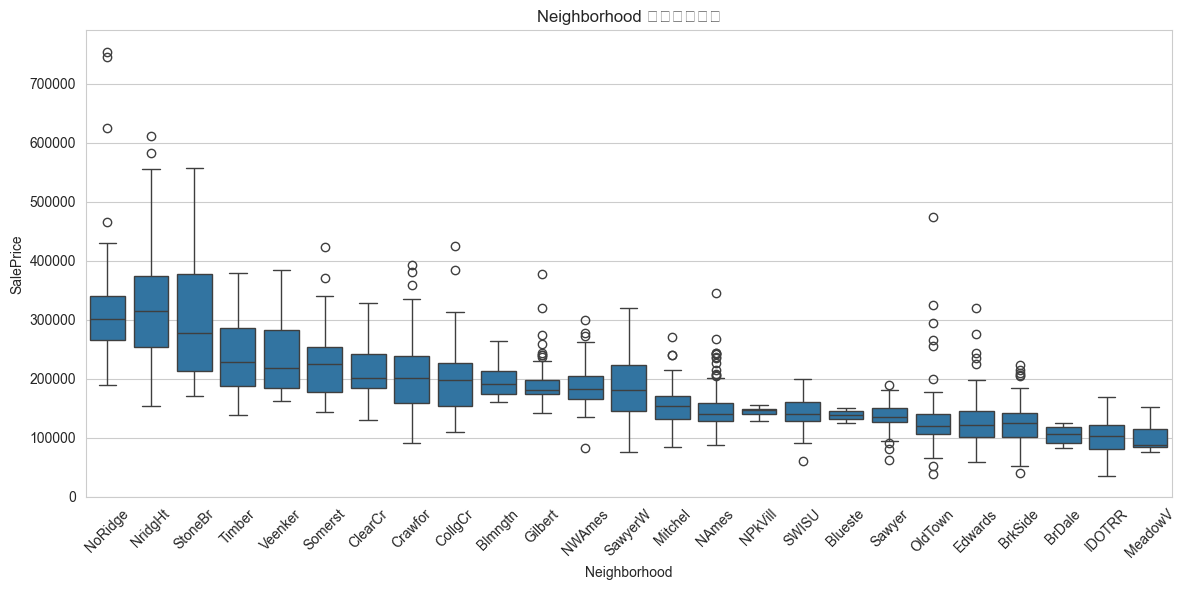

Neighborhood: 25 個類別
價格範圍: $98,576 - $335,295


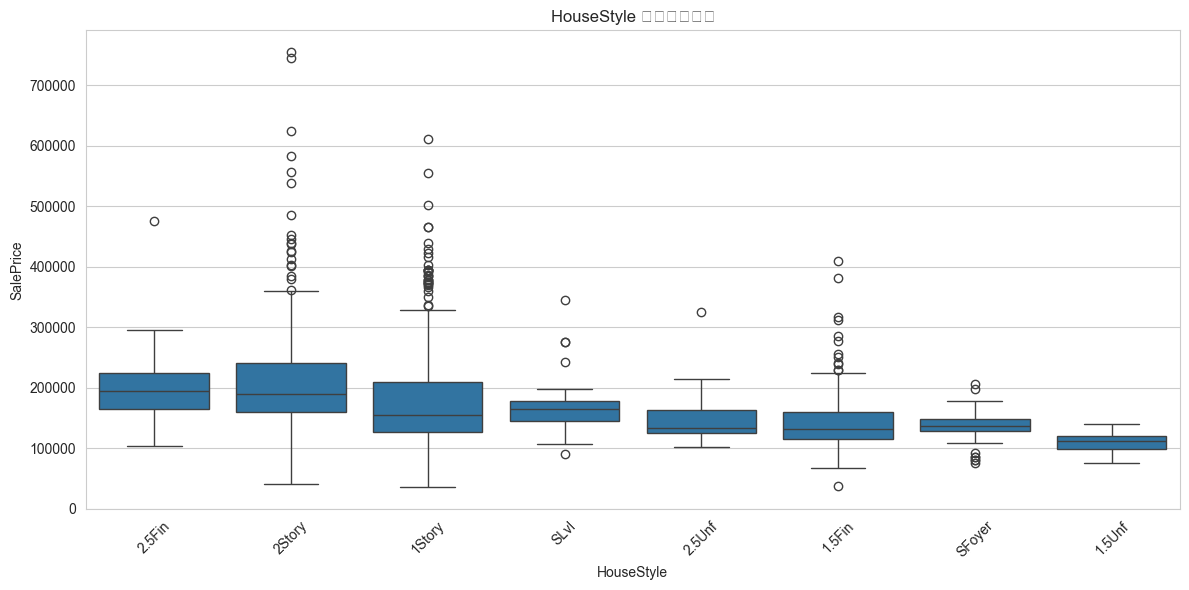

HouseStyle: 8 個類別
價格範圍: $110,150 - $220,000


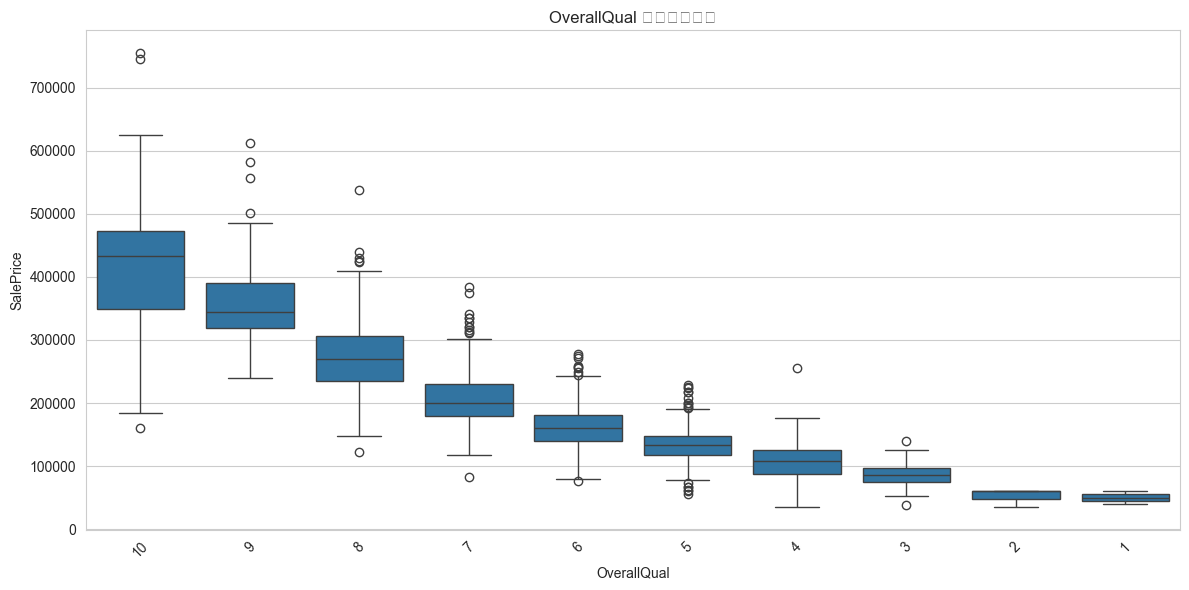

OverallQual: 10 個類別
價格範圍: $50,150 - $438,588


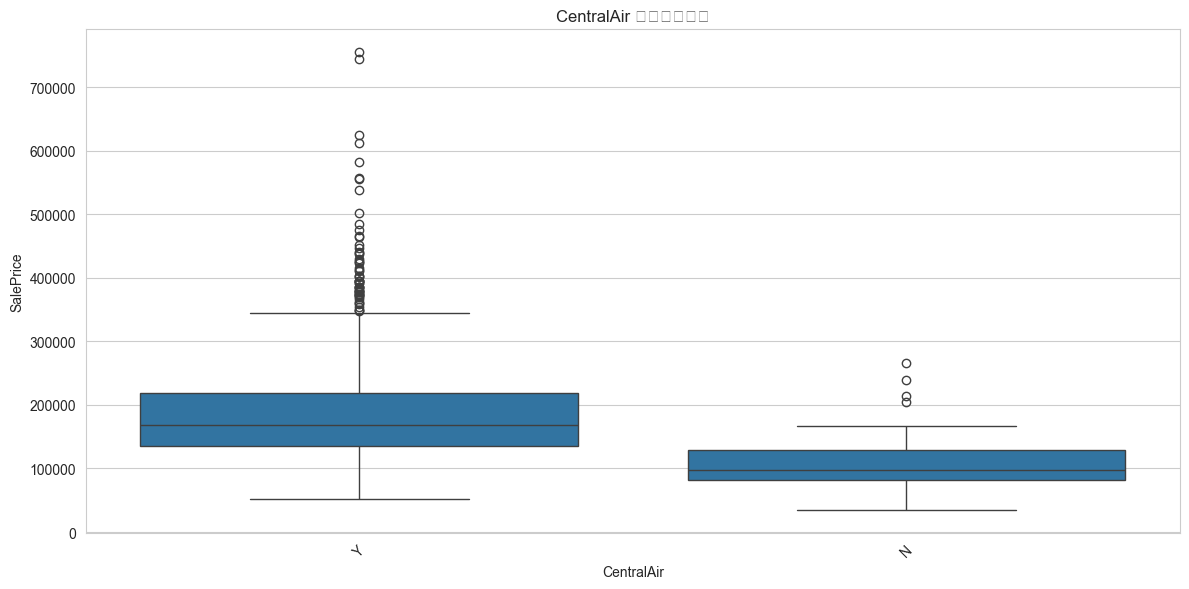

CentralAir: 2 個類別
價格範圍: $105,264 - $186,187


In [44]:
# Cell 8: 類別特徵分析
print("🏘️ 類別特徵分析")

if train_transformed is not None:
    # 選擇重要的類別特徵
    categorical_features = ['Neighborhood', 'HouseStyle', 'OverallQual', 'CentralAir']
    
    # 分析每個類別特徵
    for feature in categorical_features:
        if feature in train_transformed.columns:
            # 檢查是否為類別型或數值型但類別數少
            if (train_transformed[feature].dtype == 'object' or 
                train_transformed[feature].nunique() < 15):
                
                plt.figure(figsize=(12, 6))
                
                # 計算平均價格
                if 'SalePrice' in train_transformed.columns:
                    mean_prices = train_transformed.groupby(feature)['SalePrice'].mean().sort_values(ascending=False)
                    
                    # 繪製箱形圖
                    sns.boxplot(data=train_transformed, x=feature, y='SalePrice', order=mean_prices.index)
                    plt.xticks(rotation=45)
                    plt.title(f'{feature} 對房價的影響')
                    plt.tight_layout()
                    plt.show()
                    
                    print(f"{feature}: {train_transformed[feature].nunique()} 個類別")
                    print(f"價格範圍: ${mean_prices.min():,.0f} - ${mean_prices.max():,.0f}")

In [45]:
# Cell 9: 總結報告
print("=" * 60)
print("📋 EDA 總結報告")
print("=" * 60)

if train is not None and train_clean is not None:
    # 收集分析結果
    summary = {
        "資料品質": [
            f"原始資料: {train.shape}",
            f"清理後資料: {train_clean.shape}",
            f"缺失值欄位: {len(missing_report) if 'missing_report' in locals() else 'N/A'} 個",
            f"移除欄位: {train.shape[1] - train_clean.shape[1]} 個"
        ],
        "目標變數": [
            f"價格範圍: ${train['SalePrice'].min():,} - ${train['SalePrice'].max():,}" if 'SalePrice' in train.columns else "目標變數: 無",
            f"偏態係數: {train['SalePrice'].skew():.3f}" if 'SalePrice' in train.columns else "",
            "建議: 對數轉換改善分布" if 'SalePrice' in train.columns else ""
        ],
        "重要發現": [
            f"最相關特徵: {corr_df.iloc[1]['特徵']} ({corr_df.iloc[1]['相關係數']:.3f})" if 'corr_df' in locals() else "相關性: 未分析",
            f"強相關特徵(>0.5): {len(corr_df[corr_df['相關係數'] > 0.5])} 個" if 'corr_df' in locals() else "",
            f"新增特徵: {len(new_feature_cols)} 個" if 'new_feature_cols' in locals() else ""
        ],
        "後續步驟建議": [
            "進行進階特徵工程",
            "處理類別變數編碼", 
            "建立預測模型",
            "模型評估與優化"
        ]
    }

    # 輸出總結
    for category, items in summary.items():
        print(f"\n{category}:")
        for item in items:
            if item:  # 只輸出非空字串
                print(f"  • {item}")

print("\n" + "=" * 60)
print("🎉 模組化 EDA 分析完成！")
print("=" * 60)

📋 EDA 總結報告

資料品質:
  • 原始資料: (1460, 81)
  • 清理後資料: (1460, 77)
  • 缺失值欄位: 19 個
  • 移除欄位: 4 個

目標變數:
  • 價格範圍: $34,900 - $755,000
  • 偏態係數: 1.883
  • 建議: 對數轉換改善分布

重要發現:
  • 最相關特徵: OverallQual (0.791)
  • 強相關特徵(>0.5): 11 個
  • 新增特徵: 7 個

後續步驟建議:
  • 進行進階特徵工程
  • 處理類別變數編碼
  • 建立預測模型
  • 模型評估與優化

🎉 模組化 EDA 分析完成！


In [46]:
# Cell 10: 輸出分析結果
print("💾 儲存分析結果")

from report_generator import save_analysis_results, save_visualizations, generate_summary_report

# 收集所有圖表
figures_dict = {
    'price_distribution': fig_price if 'fig_price' in locals() else None,
    'correlation_analysis': fig_corr if 'fig_corr' in locals() else None
}

# 儲存分析結果
save_analysis_results(
    train_df=train,
    corr_df=corr_df if 'corr_df' in locals() else None,
    missing_df=missing_report if 'missing_report' in locals() else None,
    new_features=new_feature_cols if 'new_feature_cols' in locals() else None
)

# 儲存圖表
save_visualizations(figures_dict)

# 生成總結報告
generate_summary_report(
    train_df=train,
    corr_df=corr_df if 'corr_df' in locals() else None,
    missing_df=missing_report if 'missing_report' in locals() else None,
    new_features=new_feature_cols if 'new_feature_cols' in locals() else None
)

print("\n🎉 所有分析結果已儲存至 reports/ 資料夾！")

💾 儲存分析結果
✅ 已儲存: correlation_analysis.csv
✅ 已儲存: missing_value_report.csv
✅ 已儲存: numeric_statistics.csv
✅ 已儲存: new_features.csv
✅ 已儲存圖表: price_distribution.png
✅ 已儲存圖表: correlation_analysis.png
✅ 已儲存: eda_summary_report.txt
🏠 房屋價格 EDA 分析報告
生成時間: 2025-11-09 20:10:25

📊 資料基本資訊:
  • 資料形狀: (1460, 81)
  • 數值特徵: 38
  • 類別特徵: 43
  • 目標變數範圍: $34,900 - $755,000

🕳️ 缺失值分析:
  • 有缺失值的欄位: 19 個
  • 總缺失值數量: 7829
  • PoolQC: 99.52% 缺失
  • MiscFeature: 96.3% 缺失
  • Alley: 93.77% 缺失

📈 重要特徵發現:
  • OverallQual: 0.791 (極強)
  • GrLivArea: 0.709 (極強)
  • GarageCars: 0.640 (強)
  • GarageArea: 0.623 (強)
  • TotalBsmtSF: 0.614 (強)

🛠️ 特徵工程:
  • 新增特徵數量: 7
  • HouseAge
  • TotalArea
  • HasPool
  • TotalBath
  • log_SalePrice
  • ... 還有 2 個特徵

💡 後續建議:
  1. 進行進階特徵工程與選擇
  2. 處理類別變數編碼
  3. 建立預測模型
  4. 模型評估與超參數調優


🎉 所有分析結果已儲存至 reports/ 資料夾！
